# On the Network Topology

In [27]:
import math
import numpy as np
from scipy.special import comb

from matplotlib import pyplot as plt
%matplotlib inline

## Parallel Connections

Let $K$ be the number of inputs a neuron receives and $L$ the total number of neurons in the network.
We define the degree of a (directed) connection between two neurons as the number of parallel (directed) connections between these two neurons.
Assuming an independent and uniform sampling of the source neurons when connecting the network, the probability of not having an $m$ th degree connection is given by
$$
    \left(1 - \frac{1}{L^{m-1}}\right)^{L \binom{K}{m}} \simeq \exp\left(- \frac{L^2}{\sqrt{2 \pi m}} \left( \frac{Ke}{mL}\right)^m\right)
$$ 
for $L^{m-1} \gg 1$ and $K \gg m$.

In [28]:
def probability(num_inputs, num_neurons, degree):
    return np.power(1-np.power(1/num_neurons, degree-1), num_neurons * comb(num_inputs, degree)) 

In [29]:
num_neurons = 10000
degree = 3
num_inputs = 10

In [30]:
probability(num_inputs, num_neurons, degree)

0.9880717127430684

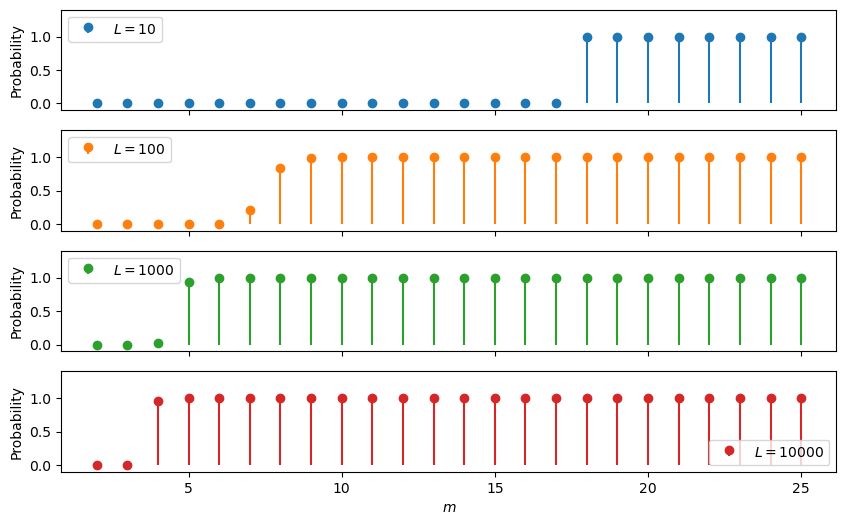

In [35]:
fig, axes = plt.subplots(4, 1, figsize=(10,6), sharex=True)

num_inputs = 100
degree = np.arange(2, 26)
for i, num_neurons in enumerate([10, 100, 1000, 10000]):
    axes[i].stem(degree, probability(num_inputs, num_neurons, degree), basefmt=" ", markerfmt=f"C{i}o", linefmt=f"C{i}", label=f"$L = {num_neurons}$")
    axes[i].set_ylim(-0.1, 1.4)
    axes[i].legend()
    axes[i].set_ylabel("Probability")

axes[-1].set_xlabel("$m$")

plt.show()

TODO: Plot the required number of neurons (y) to make a pair of degree m (legend) very unlikely for different number of inputs (x)

From 
$$
    \exp\left(- \frac{L^2}{\sqrt{2 \pi m}} \left( \frac{Ke}{mL}\right)^m\right) \geq 1 - \varepsilon
$$ 
we get 
$$
    L \geq \left(- \left( \frac{Ke}{m} \right)^m \frac{1}{\sqrt{2 \pi m} \ln (1 - \varepsilon)}\right)^{1/(m-2)}
$$

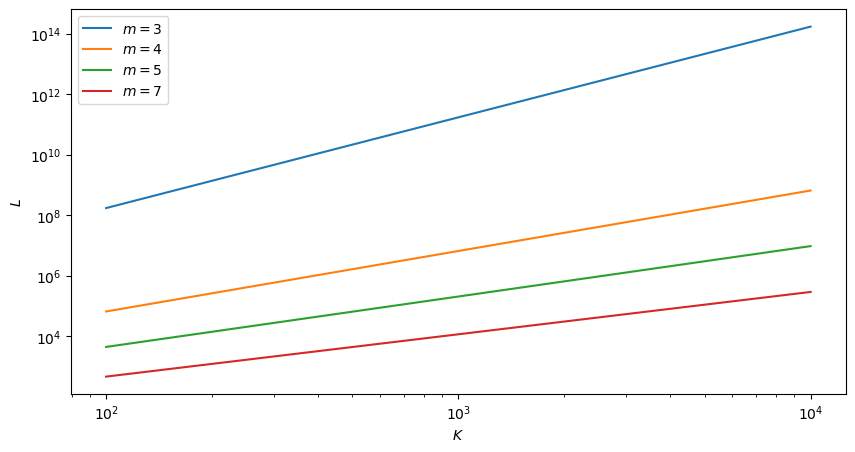

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

eps = 1e-3
fun = lambda K, m: np.power(-np.power(K*math.e/m,m) / (np.sqrt(2 * math.pi * m) * np.log(1 - eps)), 1 / (m - 2))

num_inputs = np.logspace(2, 4)
for i, degree in enumerate([3, 4, 5, 7]):
    ax.loglog(num_inputs, fun(num_inputs, degree), color=f"C{i}", label=f"$m = {degree}$")

ax.legend()
ax.set_xlabel("$K$")
ax.set_ylabel("$L$")

plt.show()

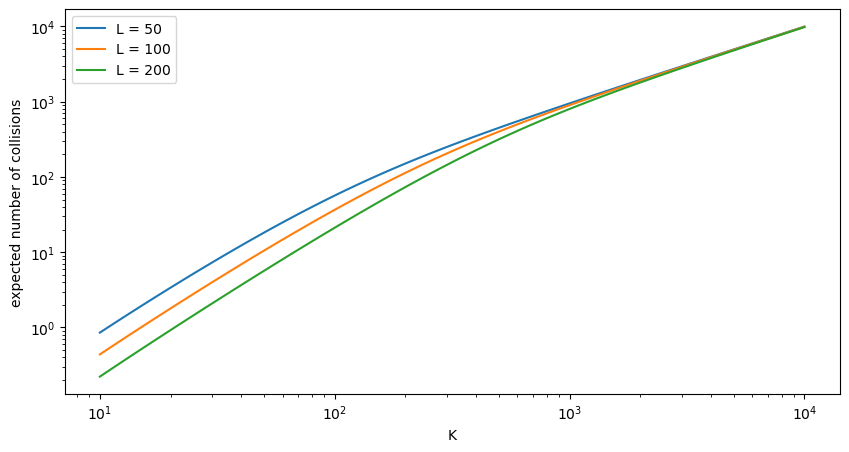

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

def expected_num_collisions(num_inputs, num_neurons):
    return num_inputs + num_neurons * (np.power((num_neurons - 1)/num_neurons, num_inputs) - 1)

num_inputs = np.logspace(1, 4, 75)
for i, num_neurons in enumerate([50, 100, 200]):
    ax.loglog(num_inputs, expected_num_collisions(num_inputs, num_neurons), color=f"C{i}", label=f"L = {num_neurons}")

ax.set_xlabel("K")
ax.set_ylabel("expected number of collisions")
ax.legend()

plt.show()